In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Ejercicio 1:
Escribe un código que haga los siguientes cambios en la imagen dada:


Imagen original:

![Original](./Resources/Exercise/Lenna_(test_image).png "Original")


Cambio 1:

![Original](./Resources/Exercise/result_regions.png "Original")


Cambio 2:

![Original](./Resources/Exercise/result_swap.png "Original")


pista: comando np.roll

Cambio 1:

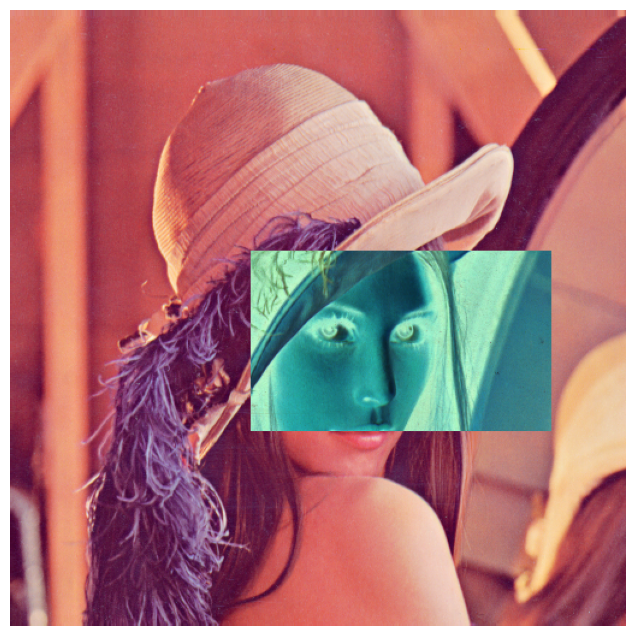

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
# Por defecto, OpenCV la carga en formato BGR (azul-verde-rojo).
img = cv.imread('./Resources/Exercise/Lenna_(test_image).png')  # Ruta de la imagen
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # Convertir a RGB para matplotlib

# Con esto definimos un rectángulo dentro de la imagen
x, y, w, h = 200, 200, 250, 150  # ajustes del cuadrado
roi = img_rgb[y:y+h, x:x+w] # recorta esa sección rectangular de la imagen original.

# Invierte los colores de cada píxel en la región
roi_invertido = 255 - roi

# Superponer de nuevo en la imagen original
output = img_rgb.copy()
output[y:y+h, x:x+w] = roi_invertido

plt.figure(figsize=(8, 8))
plt.imshow(output) # Muestra la imagen modificada
plt.axis('off')
plt.show()


Cambio 2:

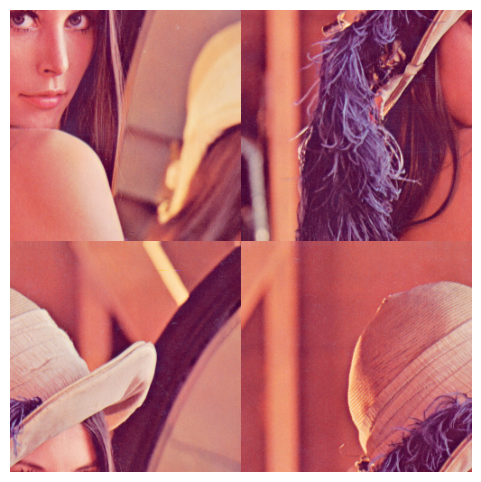

In [4]:
# Cargar la imagen original
# Cargar la imagen
img = cv.imread('./Resources/Exercise/Lenna_(test_image).png')  # Ruta de la imagen
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # Convertir a RGB para matplotlib

# calculamos las dimensiones de la imagen y obtenemos la mitad de esas dimensiones,
# para luego poder dividirla en cuadrantes iguales
# half_h y half_w son la mitad de la altura y anchura de la imagen
h, w, _ = img_rgb.shape
half_h, half_w = h // 2, w // 2

# Con esto creo 4 subimágenes que cubren cada cuarto de la imagen original
top_left     = img_rgb[0:half_h,     0:half_w]
top_right    = img_rgb[0:half_h,     half_w:w]
bottom_left  = img_rgb[half_h:h,     0:half_w]
bottom_right = img_rgb[half_h:h,     half_w:w]

# np.hstack(): une arrays horizontalmente
# np.vstack(): une arrays verticalmente.
top_row = np.hstack((bottom_right, bottom_left)) #  # Une horizontalmente: abajo-derecha + abajo-izquierda
bottom_row = np.hstack((top_right, top_left)) 
final_image = np.vstack((top_row, bottom_row)) # Crea la imagen final

# Mostrar imagen final
plt.figure(figsize=(6, 6))
plt.imshow(final_image)
plt.axis('off')
plt.show()


---

Ejercicio 2: Graba un video de unos segundos de tu cara moviéndose por la pantalla (que no se quede fija en el centro solamente) con tu webcam del ordenador. Haz un detector de caras con dicho vídeo. Asegúrate de que tu cara está correctamente iluminada, ya que el modelo es bastante sensible.

Extra: intenta hacerlo con vídeo en directo tomado desde tu webcam.

In [5]:
import cv2
import os

# Ruta del video 
video_path = './Resources/Exercise/video_cara.mp4'

# Ruta para guaradar el video
desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop')
output_path = os.path.join(desktop_path, 'video_con_caras.avi')  # Nombre del archivo de salida

# Cargar clasificador Haar, modelo preentrenado de detección de caras que OpenCV trae por defecto
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Cargar video
cap = cv2.VideoCapture(video_path)

# Verificar que se cargó bien
if not cap.isOpened():
    print("Error: No se pudo abrir el video.")
    exit()

# Obtener propiedades del video original
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) # ancho en píxeles de cada frame del video.
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)) # alto en píxeles de cada frame del video.
fps = cap.get(cv2.CAP_PROP_FPS) # frames por segundo del video original

# Crear VideoWriter para guardar el nuevo video
# Se crea el nuevo video con el mismo tamaño y velocidad
# el video de salida tendrá la misma resolución y fluidez que el original
fourcc = cv2.VideoWriter_fourcc(*'XVID') # define el codec de compresión de video
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

print(f"Guardando video en: {output_path}")

# bucle principal que procesa cada frame del video, detecta caras, dibuja los rectángulos,
# muestra el resultado


while True:
    # ret, frame = cap.read() cap.read() lee un solo frame del video. ret es True si se leyó correctamente, 
    # False si ya no hay más (fin del video). frame es la imagen actual (matriz de píxeles).
    ret, frame = cap.read() 
    if not ret:
        break
 # Convierte el frame de color (BGR) a escala de grises.
 # Los clasificadores Haar funcionan mejor en escala de grises, ya que no necesitan color.
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detección de caras
    # Aplica el detector de caras sobre la imagen en escala de grises.
    # Devuelve una lista de coordenadas (x, y, w, h) para cada cara encontrada.
    # scaleFactor=1.1: cómo se reduce la imagen en cada paso de la pirámide (más bajo = más preciso pero más lento).
    # minNeighbors=5: cuántos rectángulos vecinos necesita un área para considerarse una cara válida (más alto = menos detecciones falsas).
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    # Dibujar rectángulos
    # Por cada cara detectada, dibuja un rectángulo verde ((0, 255, 0)) sobre el frame original.
    # (x, y) es la esquina superior izquierda, (x+w, y+h) la inferior derecha.
    # El grosor del borde es 2.
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Mostrar en pantalla (opcional)
    cv2.imshow('Detectando caras...', frame)

    # Guardar frame en el archivo de salida
    out.write(frame)

    # Salir con 'q'
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# Liberar recursos
cap.release()
out.release()
cv2.destroyAllWindows()


Guardando video en: C:\Users\nsara\Desktop\video_con_caras.avi


---

Ejercicio Extra (para los que hayan terminado lo anterior)

Había una vez, un caracol con el que se metían mucho. Tanto era así, que decidió apuntarse a un gimnasio para ponerse súper fuerte para darle una paliza a todo el mundo. Sin embargo, no era capaz de apuntarse. Vuestra tarea será conseguir que el caracol se haga un selfie mientras está entrenando y le ponga un hashtag a la foto del siguiente modo:

![Original](./Resources/Exercise/gym_snail.png "selfie")

In [ ]:
snail = cv.imread('./Resources/Exercise/snail.jpg')
gym = cv.imread('./Resources/Exercise/gym.jpg')

# Cambia el tamaño de la imagen del gimnasio para que coincida con la del caracol
gym = cv.resize(gym, (snail.shape[1], snail.shape[0]))

# crea más cara del caracol
# y luego hacerla invertida
# crear el caracol

# colocar el caracol en la foto del gym

# luego hacer el hastag
# cv.putText() dibuja texto en la imagen, tamaño fuente color y coordenadas

